Source: https://medium.com/@jcldinco/downloading-historical-tweets-using-tweet-ids-via-snscrape-and-tweepy-5f4ecbf19032

# Install snscrape and Tweepy
See more about snscrape here: https://github.com/JustAnotherArchivist/snscrape
See more about Tweepy here: https://www.tweepy.org/

In [7]:
!pip install snscrape

In [8]:
!pip install tweepy

## Examples of snscrape queries to tollect URL of tweets. Sample queries are provided below enclosed in * *

snscrape has the following modules for tweets: 
                 twitter-search,
                 twitter-thread,
                 twitter-list-members,
                 twitter-user,
                 twitter-hashtag,
                 twitter-list-posts


### Search tweets by hashtags

\* snscrape twitter-search "#ArtificialIntelligence since:2015-01-01 until:2015-05-31" > /Users/abby/Desktop/AI_Tweets_2015.txt\*

or

\* snscrape twitter-hashtag "#ArtificialIntelligence since:2015-01-01 until:2015-05-31" \*
 

### Search tweets by keywords

\* snscrape twitter-search "Environment since:2018-01-01 until:2018-03-31"> /Users/abby/Desktop/AI_Tweets_2018.txt \*

### Search tweets by users

\* snscrape twitter-user "BarackObama since:2020-01-01 until:2020-10-31" \*


### Search Tweets by @ someone

\* snscrape twitter-search "@Tesla #Environment since:2020-05-15 until:2020-10-31" \*


In [5]:
#Create a folder to store the tweets URL
import os 
parent_dir = "/Users/abby/Desktop/Tweets_Demo/" # Change to your folder path
os.mkdir(parent_dir) 

# Example: collect tweets that have the keyword "corporate social responsibility" in March 2018 

In [8]:
import os
query='snscrape twitter-search "corporate social responsibility since:2018-03-01 until:2018-03-31"> '+parent_dir+'CSR2018.txt'
os.system(query)

0

## When you open the txt file, you will see URL of tweets collected
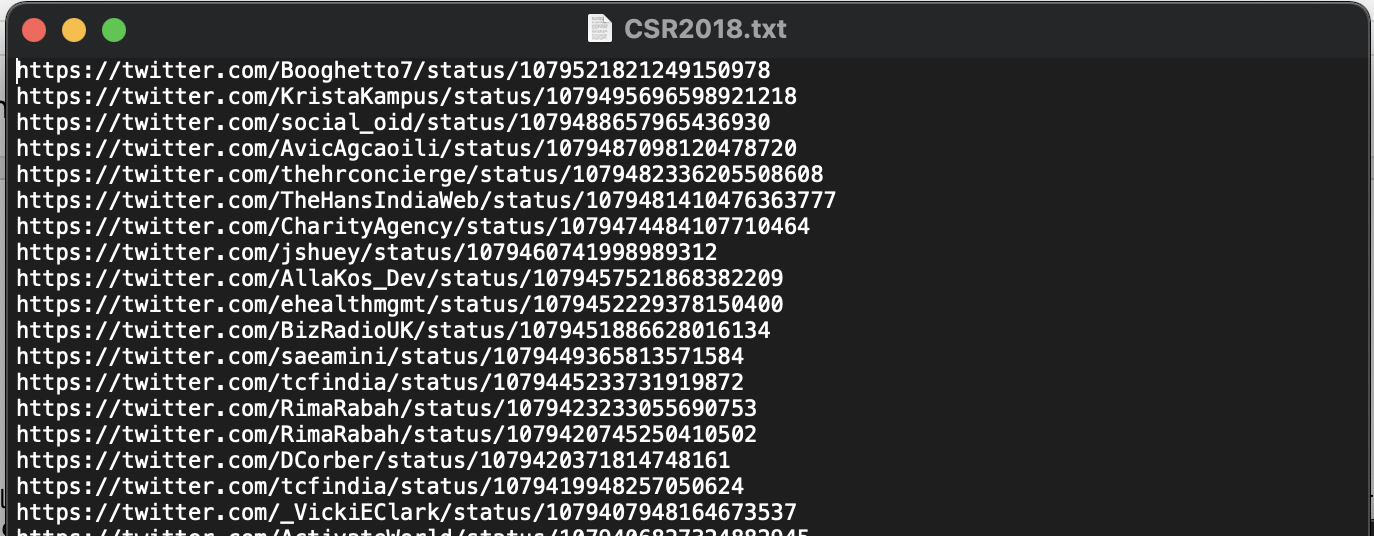

## Go to any tweets you will see the key word is captured.
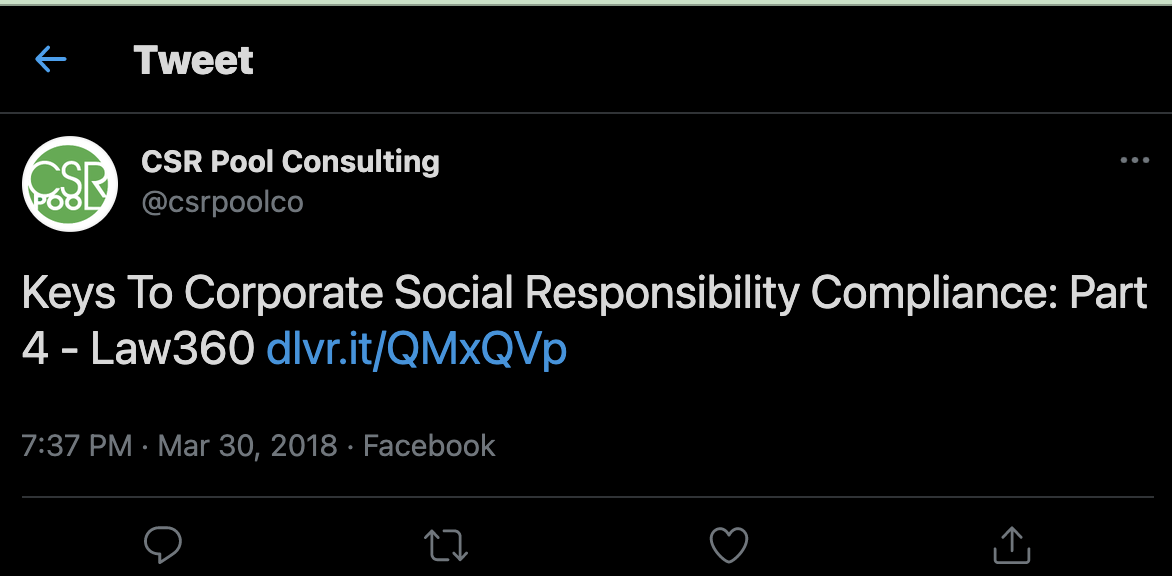

# Extract tweets from URL using Tweepy
<span class="burk">To use this function, you need to apply for Twitter API from https://developer.twitter.com/en/docs/twitter-api</span>

In [9]:
import pandas as pd, tweepy

In [11]:
#Provide your Twitter API account information.</span> 

consumer_key = "XXXXXXXXXXX" 
consumer_secret = "XXXXXXXXXXXX" 
access_token = "XXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXX"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [12]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(parent_dir)]

In [13]:
files

['CSR2018.txt']

In [14]:
AllID=[]
for eachfile in files:
    tweet_url = pd.read_csv(parent_dir+'CSR2018.txt', index_col= None, header = None, names = ["links"])
    af = lambda x: x["links"].split("/")[-1]
    try:    
        tweet_url['id'] = tweet_url.apply(af, axis=1)
        ids = tweet_url['id'].tolist()
        for idd in ids:     
            AllID.append(idd)
    except:
        pass

In [15]:
len(AllID)

3776

In [20]:
batchsize=100 #Set the batch size small, otherwise, you may get an error from Twitter API
total_count = len(AllID)
chunks = (total_count - 1) // batchsize + 1

def fetch_tw(AllID,i):
    list_of_tw_status = api.statuses_lookup(AllID, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    for status in list_of_tw_status:
            tweet_elem = {"tweet_id": status.id,
                     "user": status.user.screen_name,
                          "reply":status.in_reply_to_screen_name,
                          "Is_quote":status.is_quote_status,
                          #"quoted_count":status.quote_count,
                          #"reply_count":status.reply_count,
                          "retweet_count":status.retweet_count,
                          "favorite_count":status.favorite_count,
                     "tweet":status.full_text,
                     "date":status.created_at} # Please refer to https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/tweet-object for variables you can obtain via Tweepy
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
    empty_data.to_excel(parent_dir+"Tweets collected_"+str(i)+".xlsx")

In [22]:
for i in range(0,chunks):
    batch = AllID[i*batchsize:(i+1)*batchsize]
    result = fetch_tw(batch,i)

## Now, you will see tweets extracted are saved in different excel workbook
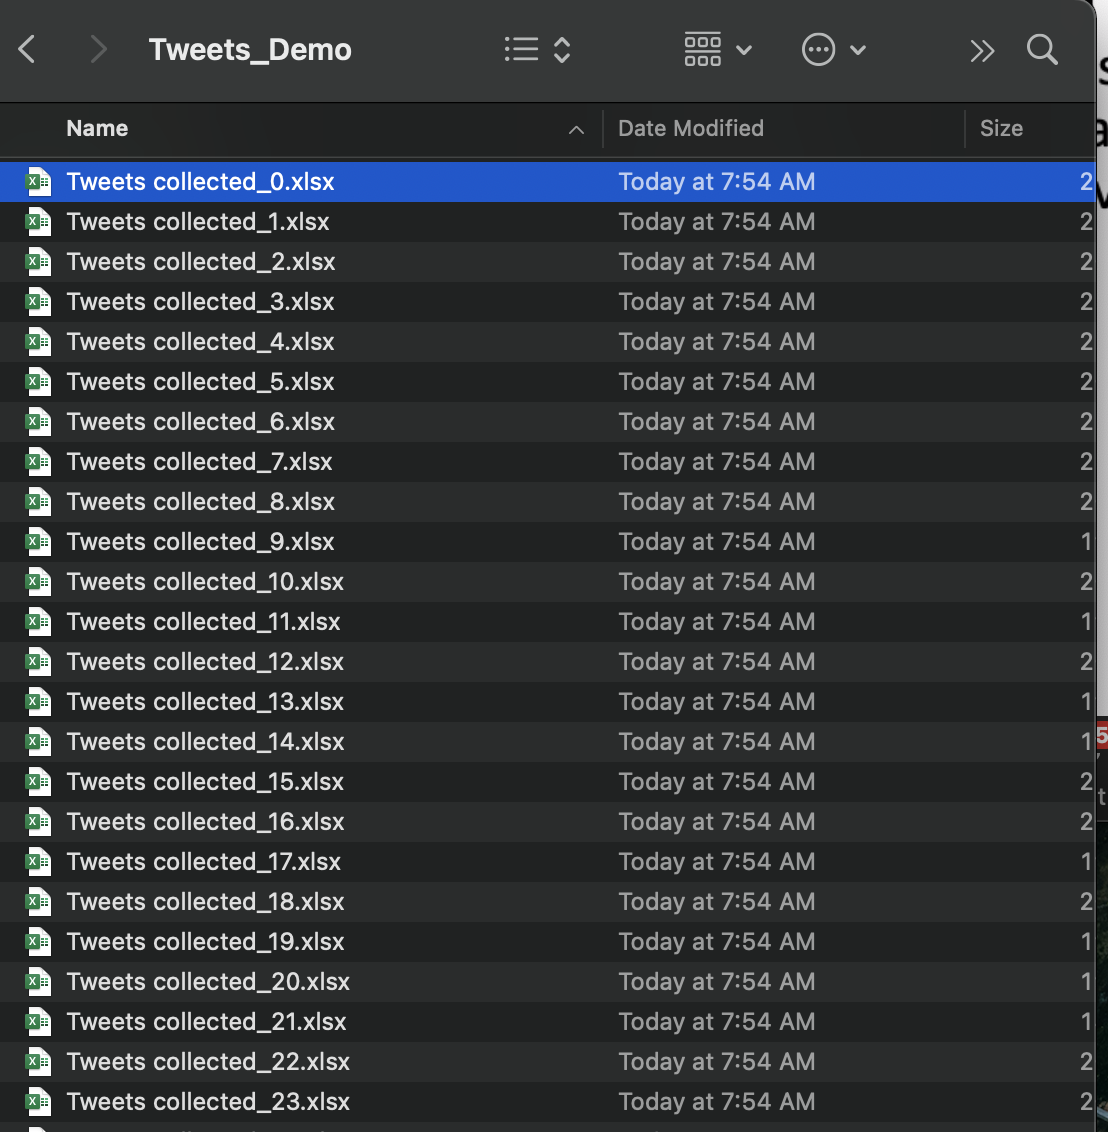

## Open any file to see what has been extraced
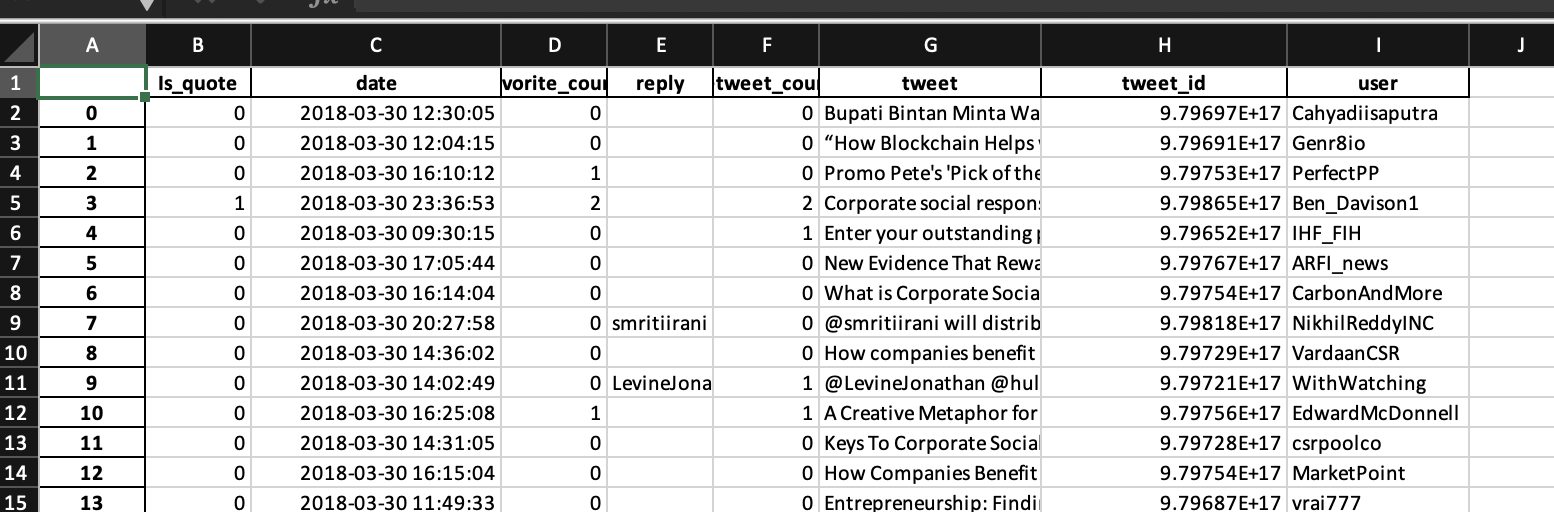